# Cell processing, clustering and annotation from CellSeg output, HVCD1

region 2 looks good

In [2]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import anndata as ad
from scipy.sparse import csr_matrix

In [2]:
dat = pd.read_csv("../../Data/CellSeg/output/quantifications/HVCD1_reg2_statistics_growth5_comp.csv", index_col=0)
dat.head()

Reg  Tile Row  Tile Col  Tile Z   In-Tile Y   In-Tile X  Absolute Y  \
Cell                                                                        
1.0   0.0       1.0       1.0     0.0  493.330612   88.775510  493.330612   
2.0   0.0       1.0       1.0     0.0  754.246479  691.873239  754.246479   
3.0   0.0       1.0       1.0     0.0  739.631868  248.752747  739.631868   
4.0   0.0       1.0       1.0     0.0  520.331325  556.234940  520.331325   
5.0   0.0       1.0       1.0     0.0  556.055046  599.110092  556.055046   

      Absolute X  Cell Size       DAPI  ...     CD45RA   Mac2Gal3        CD4  \
Cell                                    ...                                    
1.0    88.775510      556.0  10.022982  ...  27.274307   7.220633  17.281672   
2.0   691.873239      342.0  17.241385  ...  29.194524   9.607808  35.321820   
3.0   248.752747      440.0  13.595430  ...   8.077854  48.845844   3.544072   
4.0   556.234940      355.0  18.969977  ...  21.778143   1.665159  23.720570   
5.0   599.110092      325.0  18.300584  ...  14.390666  26.772419  29.085952   

      Granzyme B      CD21       CD3e       aSMA      CD34      CD31      CD15  
Cell                                                                            
1.0     5.847649  3.949480   1.750955   0.658518  3.046867  1.137030  1.375415  
2.0     5.636392  4.712602  33.995056   0.908194  0.000000  0.597499  1.254698  
3.0     6.518136  3.428147   3.660991  47.923794  0.000000  0.000000  1.190123  
4.0     6.702300  5.129648  20.310963   0.987016  1.814653  0.799932  0.925853  
5.0     9.079113  5.657570  23.967475   1.619141  2.200649  0.930507  1.345267  

[5 rows x 53 columns]

In [3]:
# need to drop BCL-6 and CD-30--artifacts
dat.drop(columns=['CLEC9A', 'BCL-6', 'CD30', 'Collagen IV'], inplace=True)

In [21]:
dat.iloc[187939:187950,:]

Reg  Tile Row  Tile Col  Tile Z   In-Tile Y   In-Tile X  Absolute Y  \
Cell                                                                        
1.0   0.0       1.0       1.0     0.0  300.151292   25.738007  300.151292   
2.0   0.0       1.0       1.0     0.0  642.152727  136.381818  642.152727   
3.0   0.0       1.0       1.0     0.0  342.239044  201.011952  342.239044   
4.0   0.0       1.0       1.0     0.0  194.625000  251.668919  194.625000   
5.0   0.0       1.0       1.0     0.0  679.453642  504.993377  679.453642   
6.0   0.0       1.0       1.0     0.0   99.094801  219.975535   99.094801   
7.0   0.0       1.0       1.0     0.0   30.261261  363.252252   30.261261   
8.0   0.0       1.0       1.0     0.0  276.606250  566.803125  276.606250   
9.0   0.0       1.0       1.0     0.0  504.904762  672.532468  504.904762   
10.0  0.0       1.0       1.0     0.0  367.979885  279.459770  367.979885   
11.0  0.0       1.0       1.0     0.0  257.306818  535.744318  257.306818   

      Absolute X  Cell Size       DAPI  ...     CD45RA   Mac2Gal3        CD4  \
Cell                                    ...                                    
1.0    25.738007      543.0  25.426964  ...   7.319881   6.835181  11.502511   
2.0   136.381818      436.0  30.011424  ...   9.906308   0.182763   0.000000   
3.0   201.011952      408.0  27.011034  ...   7.271998   3.282573  10.286796   
4.0   251.668919      552.0  18.980330  ...  19.987217   7.405513   3.637845   
5.0   504.993377      511.0  21.304212  ...   0.000000   1.427489   1.897285   
6.0   219.975535      447.0  22.644826  ...  15.702022   0.000000   3.406905   
7.0   363.252252      432.0  16.767698  ...  18.267416  10.319808   4.502521   
8.0   566.803125      520.0  12.808065  ...  16.713977  58.176039   1.284399   
9.0   672.532468      417.0  22.930685  ...  10.629235   5.838243   0.000000   
10.0  279.459770      625.0  26.049185  ...   3.384556  13.468605   8.879999   
11.0  535.744318      318.0   9.983216  ...  16.798510  12.028098  14.469247   

      Granzyme B       CD21       CD3e      CD15      CD34      CD31  \
Cell                                                                   
1.0     2.589094   0.869051  15.170402  1.115761  1.359888  1.529837   
2.0     0.776616   1.245482   9.527366  0.757032  0.000000  1.574128   
3.0     0.681793   2.333215  14.069486  0.976715  0.000000  1.187418   
4.0     2.717171  10.615281   3.234538  0.000000  1.660936  2.114088   
5.0     0.810440   0.000000   5.763633  0.674488  0.579477  2.425490   
6.0     2.136319   8.160473   1.576058  1.318804  0.840855  1.321193   
7.0     1.190329   4.533557   8.325514  0.812031  1.360830  2.845791   
8.0     1.060401   0.301260  15.396111  0.665593  0.097443  3.913063   
9.0     0.798433   1.638028   5.729877  0.964693  0.097138  2.476108   
10.0    2.081030   0.799983   6.434218  0.833806  0.571155  0.260711   
11.0    1.606640   1.766807   9.673531  0.901652  0.608237  1.479395   

       Vimentin  
Cell             
1.0   19.203017  
2.0   40.604405  
3.0   90.991063  
4.0   35.098062  
5.0   28.419927  
6.0   41.633560  
7.0   48.985767  
8.0   79.822218  
9.0    1.735501  
10.0  33.759857  
11.0  67.002805  

[11 rows x 53 columns]

In [4]:
dat.index = dat.index.map(str)

(array([1.30154e+05, 7.38530e+04, 3.25500e+03, 5.10000e+02, 1.52000e+02,
        6.60000e+01, 2.20000e+01, 1.20000e+01, 4.00000e+00, 1.00000e+00]),
 array([  30. ,  344.8,  659.6,  974.4, 1289.2, 1604. , 1918.8, 2233.6,
        2548.4, 2863.2, 3178. ]),
 <BarContainer object of 10 artists>)

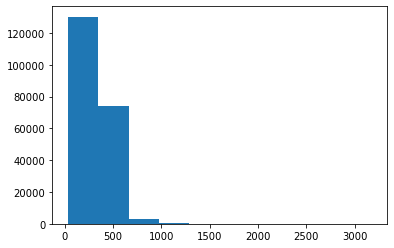

In [5]:
plt.hist(dat['Cell Size'])

In [6]:
np.where(dat.columns=="DAPI")

(array([9]),)

In [7]:
counts = csr_matrix(np.array(dat.iloc[:,9:]))

In [8]:
adata = ad.AnnData(counts)

In [9]:
adata.obs_names = dat.index
adata.var_names = list(dat.columns[9:])

In [10]:
adata.obs = dat.iloc[:,0:9]

In [11]:
adata

AnnData object with n_obs × n_vars = 208029 × 40
    obs: 'Reg', 'Tile Row', 'Tile Col', 'Tile Z', 'In-Tile Y', 'In-Tile X', 'Absolute Y', 'Absolute X', 'Cell Size'

## Now doing the processing

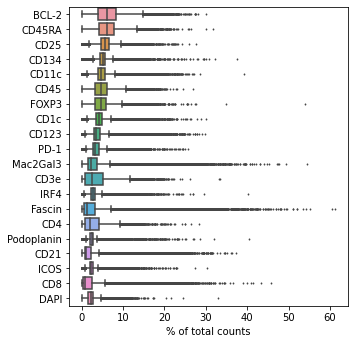

In [12]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [13]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

/mnt/isilon/cscb/software/anaconda3/envs/scanpy-basic/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


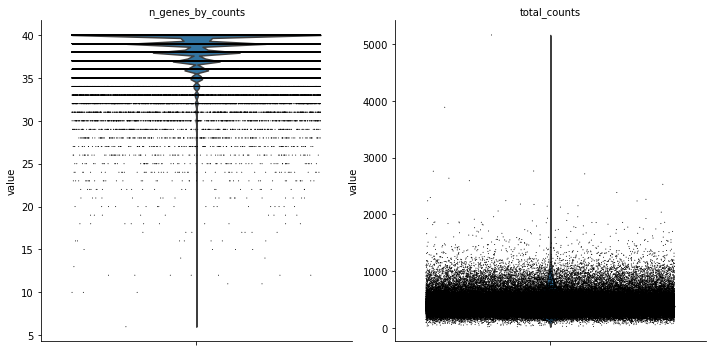

In [14]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)

In [15]:
adata = adata[adata.obs.n_genes_by_counts > 30, :]
adata = adata[adata.obs.total_counts < 1500, :]

In [16]:
sc.pp.normalize_total(adata, target_sum=1e4)
# sc.pp.log1p(adata)

/mnt/isilon/cscb/software/anaconda3/envs/scanpy-basic/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [17]:
adata.raw = adata

In [18]:
sc.pp.scale(adata)

In [19]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

In [23]:
# sc.tl.leiden(adata, resolution = 0.5)

IOStream.flush timed out


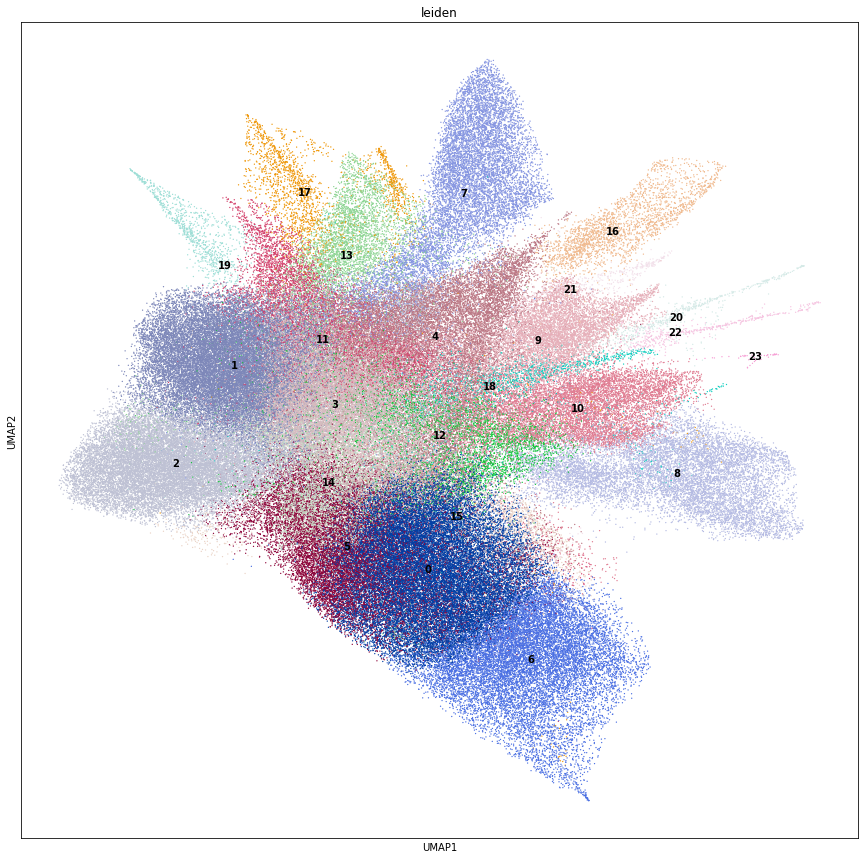

In [20]:
fig, ax = plt.subplots(figsize=(15,15))
sc.pl.umap(adata, color='leiden', ax=ax, legend_loc='on data', size = 7)
plt.show()

In [9]:
adata.write("../../outs/HVCD1_region2_CellSeg_cluster-checkpoint.h5ad")

In [3]:
adata = sc.read('../../outs/HVCD1_region2_CellSeg_cluster-checkpoint.h5ad')

## Running similar pipeline for all other samples

In [3]:
# out_root = '../../Data/CellSeg_input/output/quantifications/'
# outf = os.listdir(out_root)

In [8]:
# def process_seg(sfile):
#     dat = pd.read_csv(sfile, index_col=0)
#     dat.drop(columns=['BCL-6', 'CD30'], inplace=True)
#     dat.index = dat.index.map(str)
#     counts = csr_matrix(np.array(dat.iloc[:,9:]))
#     adata = ad.AnnData(counts)
#     adata.obs_names = dat.index
#     adata.var_names = list(dat.columns[9:])
#     adata.obs = dat.iloc[:,0:9]
#     sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
#     adata = adata[adata.obs.n_genes_by_counts > 20, :]
#     adata = adata[adata.obs.total_counts < 2000, :]
#     sc.pp.normalize_total(adata, target_sum=1e4)
#     adata.raw = adata
#     sc.pp.scale(adata)
#     return adata

In [10]:
# for f in outf:
#     print('working on {}'.format(f))
#     dat_path = os.path.join(out_root, f)
#     dat_out = process_seg(dat_path)
#     out_name = f[:-4] + '.h5ad'
#     dat_out.write(os.path.join('../../outs/simple_h5ad/', out_name))

working on K2_reg1_statistics_growth5_comp.csv
working on K2_reg4_statistics_growth5_comp.csv
working on K2_reg3_statistics_growth5_comp.csv
working on K1_reg4_statistics_growth5_comp.csv
working on K1_reg3_statistics_growth5_comp.csv
working on R1_reg2_statistics_growth5_comp.csv
working on K1_reg2_statistics_growth5_comp.csv
working on K2_reg2_statistics_growth5_comp.csv
working on K1_reg1_statistics_growth5_comp.csv
working on R1_reg3_statistics_growth5_comp.csv
working on R1_reg1_statistics_growth5_comp.csv


In [7]:
outf[0][:-4] + '.h5ad'

'K2_reg1_statistics_growth5_comp.h5ad'

## Identifying clusters
\* more likely

missing plasma, neutrophil

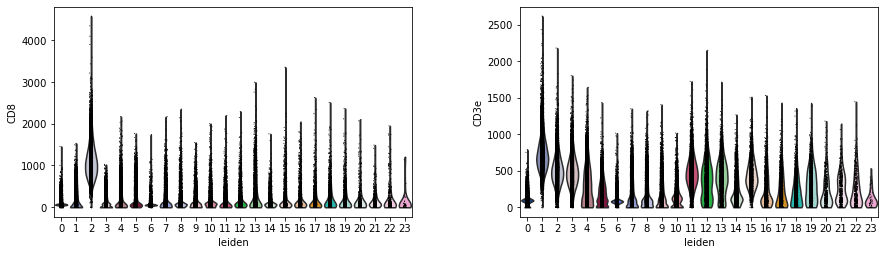

In [22]:
# CD8 t cell
sc.pl.violin(adata, ['CD8', 'CD3e'], groupby='leiden')

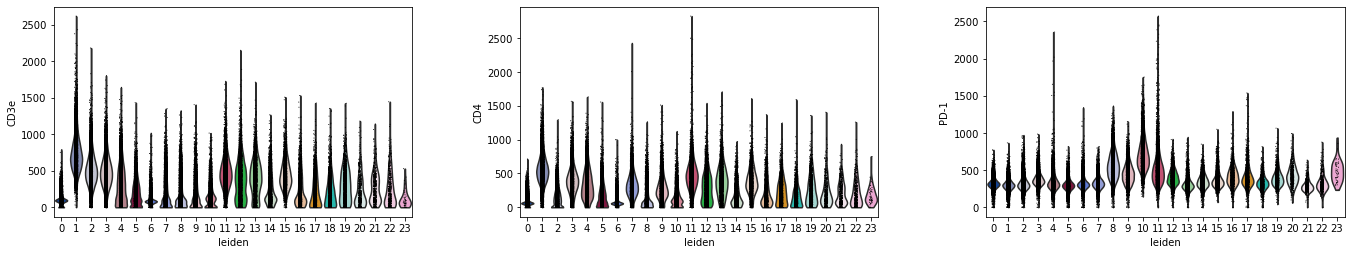

In [23]:
# CD4 t cell, Treg
sc.pl.violin(adata, ['CD3e', 'CD4', 'PD-1'], groupby='leiden')
# sc.pl.violin(adata, ['FOXP3', 'CD4', 'CD25'], groupby='leiden')

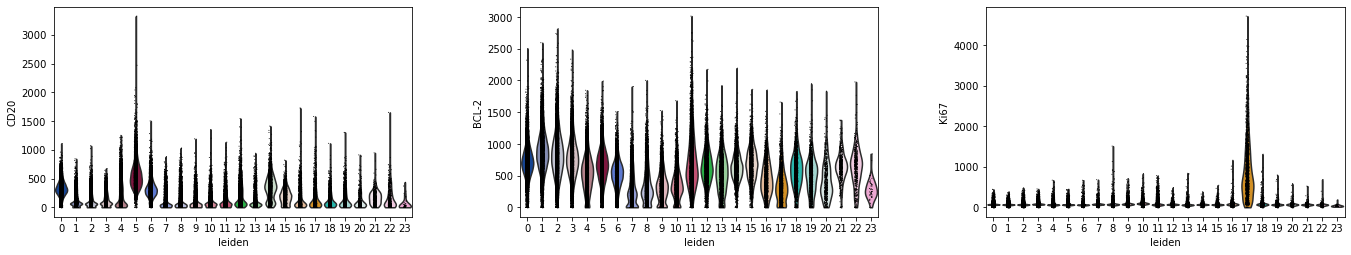

In [25]:
# B Cells
sc.pl.violin(adata, ['CD20', 'BCL-2', 'Ki67'], groupby='leiden')
# sc.pl.violin(adata, ['PAX-5', 'BCL-6', 'Ki67'], groupby='leiden')

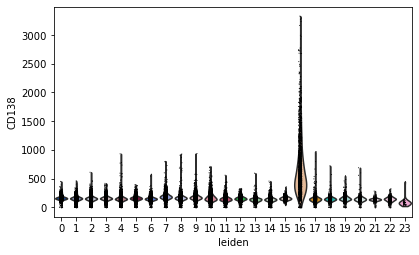

In [26]:
# Plasma cells
sc.pl.violin(adata, ['CD138'], groupby='leiden')

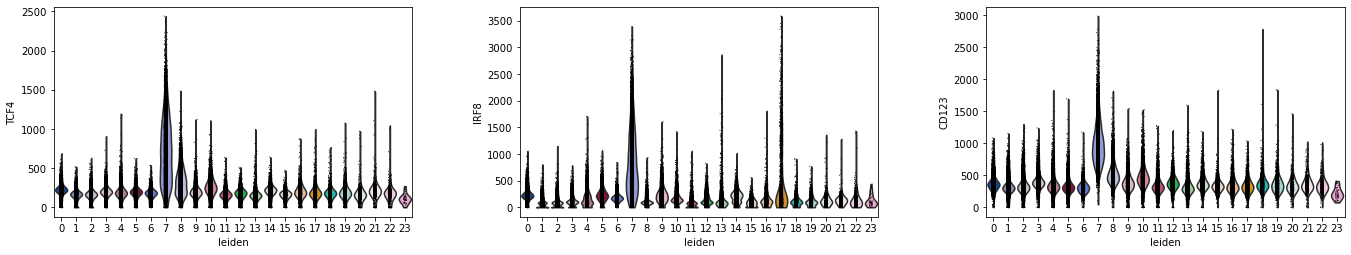

In [30]:
# pDCs
sc.pl.violin(adata, ['TCF4', 'IRF8', 'CD123'], groupby='leiden')

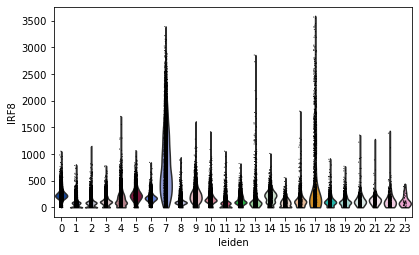

In [31]:
# cDC1
sc.pl.violin(adata, ['IRF8'], groupby='leiden')

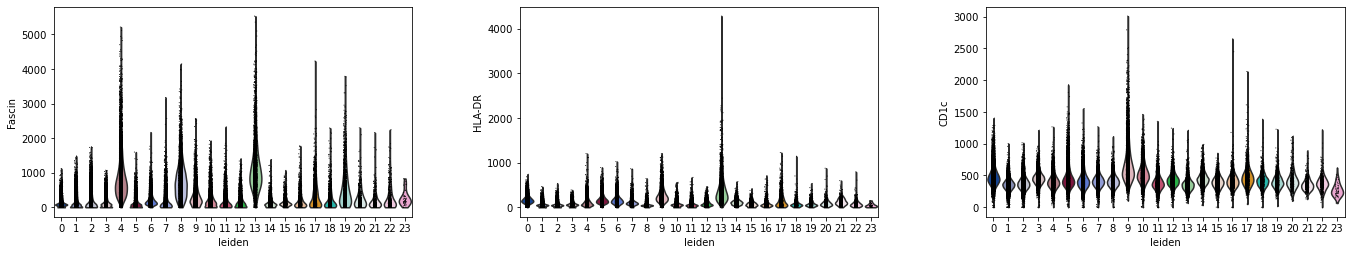

In [32]:
# cDC2
sc.pl.violin(adata, ['Fascin', 'HLA-DR', 'CD1c'], groupby='leiden')

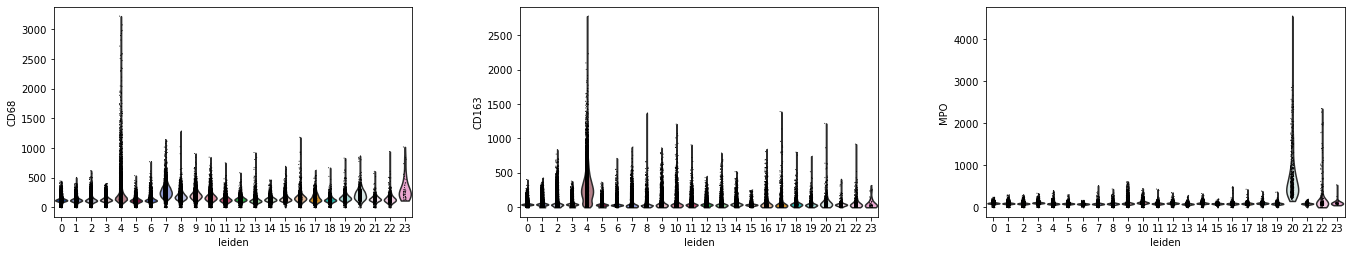

In [34]:
# macrophage
sc.pl.violin(adata, ['CD68', 'CD163', 'MPO'], groupby='leiden')

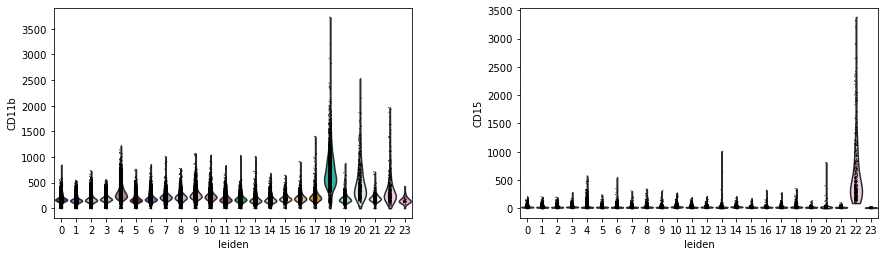

In [35]:
# Neutrophil
sc.pl.violin(adata, ['CD11b', 'CD15'], groupby='leiden')

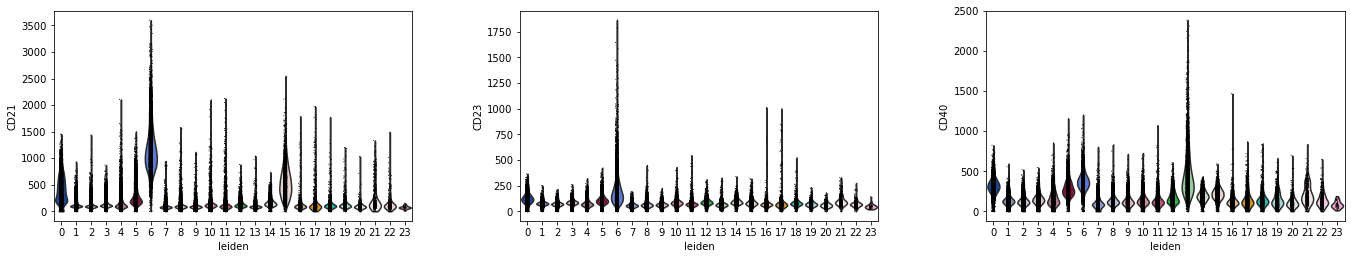

In [36]:
# FDC
sc.pl.violin(adata, ['CD21', 'CD23', 'CD40'], groupby='leiden')

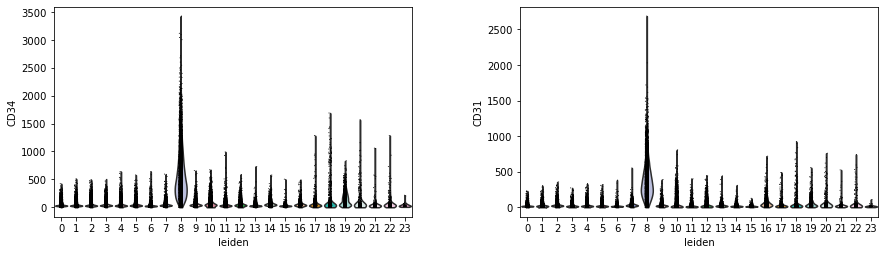

In [37]:
# Vasculature
sc.pl.violin(adata, ['CD34', 'CD31'], groupby='leiden')

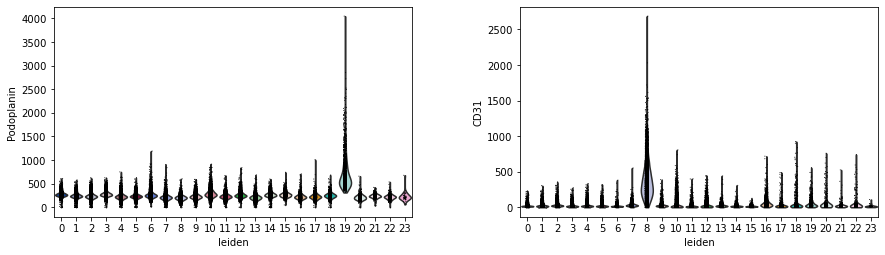

In [38]:
# Lymphatics
sc.pl.violin(adata, ['Podoplanin', 'CD31'], groupby='leiden')

In [4]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')

/mnt/isilon/cscb/software/anaconda3/envs/scanpy-basic/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/isilon/cscb/software/anaconda3/envs/scanpy-basic/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/mnt/isilon/cscb/software/anaconda3/envs/scanpy-basic/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once us

In [14]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).iloc[0:5, 20:]

20      21     22          23
0       MPO    IRF4   CD15    Tryptase
1     CD11b   CD11c  CD11b    Mac2Gal3
2  Mac2Gal3  CD45RA    MPO        CD68
3      CD68    CD23   DAPI        PD-1
4      PD-1  HLA-DR   CD25  Granzyme B

### Making the annotations

In [10]:
adata.obs['cell_type'] = "unknown"

In [11]:
# From main data...
adata.obs.loc[adata.obs['leiden'].isin(('1','3','11','12')) , 'cell_type'] = "CD4_T_Cell"
# adata.obs.loc[adata.obs['leiden'] == '6' , 'cell_type'] = "Tfh"
adata.obs.loc[adata.obs['leiden'] == '2' , 'cell_type'] = "CD8_T_Cell"
adata.obs.loc[adata.obs['leiden'].isin(('0', '5')) , 'cell_type'] = "B_Cell"
# adata.obs.loc[adata.obs['leiden'] == '5' , 'cell_type'] = "B_Cell_germ"
# adata.obs.loc[adata.obs['leiden'] == '9' , 'cell_type'] = "Treg"
adata.obs.loc[adata.obs['leiden']=='6' , 'cell_type'] = "FDC" 
adata.obs.loc[adata.obs['leiden'] == '19' , 'cell_type'] = "Lymphatics"
# adata.obs.loc[adata.obs['leiden'].isin(('14','13')) , 'cell_type'] = "Endothelial"
adata.obs.loc[adata.obs['leiden'] == '7' , 'cell_type'] = "pDC"
adata.obs.loc[adata.obs['leiden'].isin(('9', '14', '17')) , 'cell_type'] = "cDC1"
adata.obs.loc[adata.obs['leiden'] == '13' , 'cell_type'] = "cDC2"
adata.obs.loc[adata.obs['leiden'].isin(('4', '10')) , 'cell_type'] = "Macrophage"
adata.obs.loc[adata.obs['leiden'] == '20' , 'cell_type'] = "Macrophage_MPO+"
adata.obs.loc[adata.obs['leiden'] == '8' , 'cell_type'] = "Endothelial"
adata.obs.loc[adata.obs['leiden'] == '18' , 'cell_type'] = "Neutrophil"
adata.obs.loc[adata.obs['leiden'] == '15' , 'cell_type'] = "Tfh"
adata.obs.loc[adata.obs['leiden'] == '23' , 'cell_type'] = "Mast_Cell"
adata.obs.loc[adata.obs['leiden'] == '16' , 'cell_type'] = "Plasma_Cell"



In [16]:
# From subset data...
# adata.obs.loc[adata_sub.obs_names[adata_sub.obs['leiden'] == '1'] , 'cell_type'] = "pDC"
adata.obs.loc[adata_sub.obs_names[adata_sub.obs['leiden'] == '2'] , 'cell_type'] = "B_Cell"
adata.obs.loc[adata_sub.obs_names[adata_sub.obs['leiden'] == '6'] , 'cell_type'] = "Tfh"
# adata.obs.loc[adata_sub.obs_names[adata_sub.obs['leiden'].isin(('5','9','3'))] , 'cell_type'] = "fDC"
adata.obs.loc[adata_sub.obs_names[adata_sub.obs['leiden'].isin(('0','10'))] , 'cell_type'] = "activated_T_Cell"
adata.obs.loc[adata_sub.obs_names[adata_sub.obs['leiden'] == '4'] , 'cell_type'] = "Macrophage"
adata.obs.loc[adata_sub.obs_names[adata_sub.obs['leiden'] == '11'] , 'cell_type'] = "Neutrophil"
# adata.obs.loc[adata_sub.obs_names[adata_sub.obs['leiden'] == '18'] , 'cell_type'] = "Plasma"

# still missing plasma...

/mnt/isilon/cscb/software/anaconda3/envs/scanpy-basic/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cell_type' as categorical


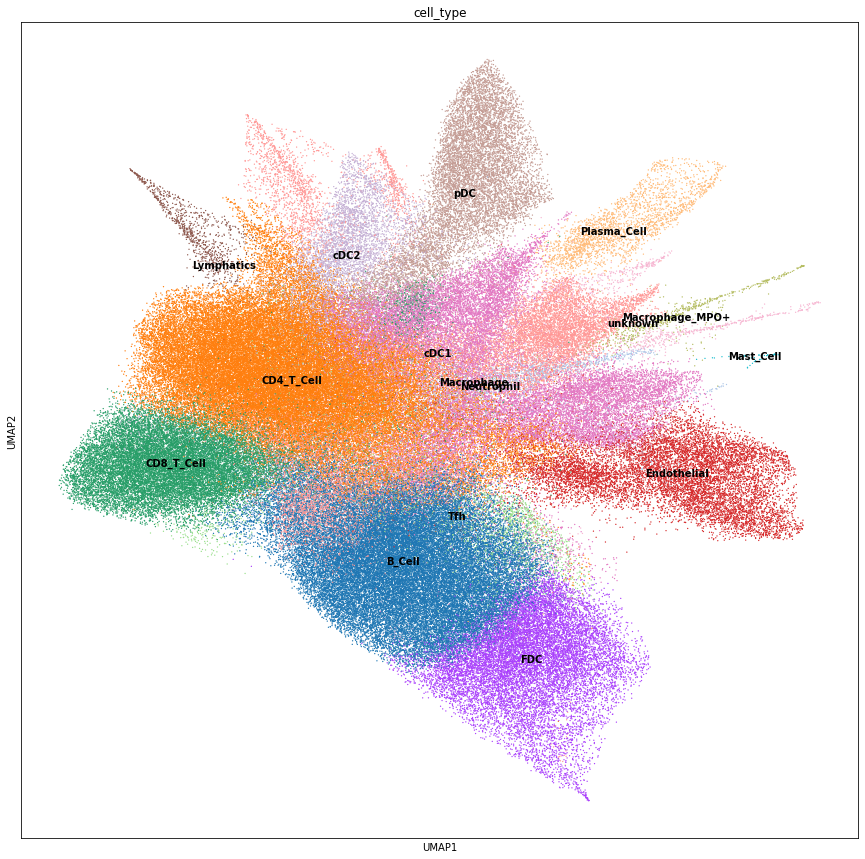

In [12]:
fig, ax = plt.subplots(figsize=(15,15))
sc.pl.umap(adata, color='cell_type', size=7, ax=ax, legend_loc='on data')
plt.show()

In [10]:
adata.obs['cell_type'].value_counts()/adata.shape[0]

CD4_T_Cell         0.285751
B_Cell             0.203792
CD8_T_Cell         0.117385
B_Cell_germ        0.060357
pDC                0.049713
fDC                0.047135
Treg               0.044370
Macrophage         0.035724
unknown            0.034105
unknown_cycling    0.030951
Endothelial        0.023972
Lymphatics         0.021000
cDC1               0.017580
cDC2               0.014000
Tfh                0.008902
Neutrophil         0.005263
Name: cell_type, dtype: float64

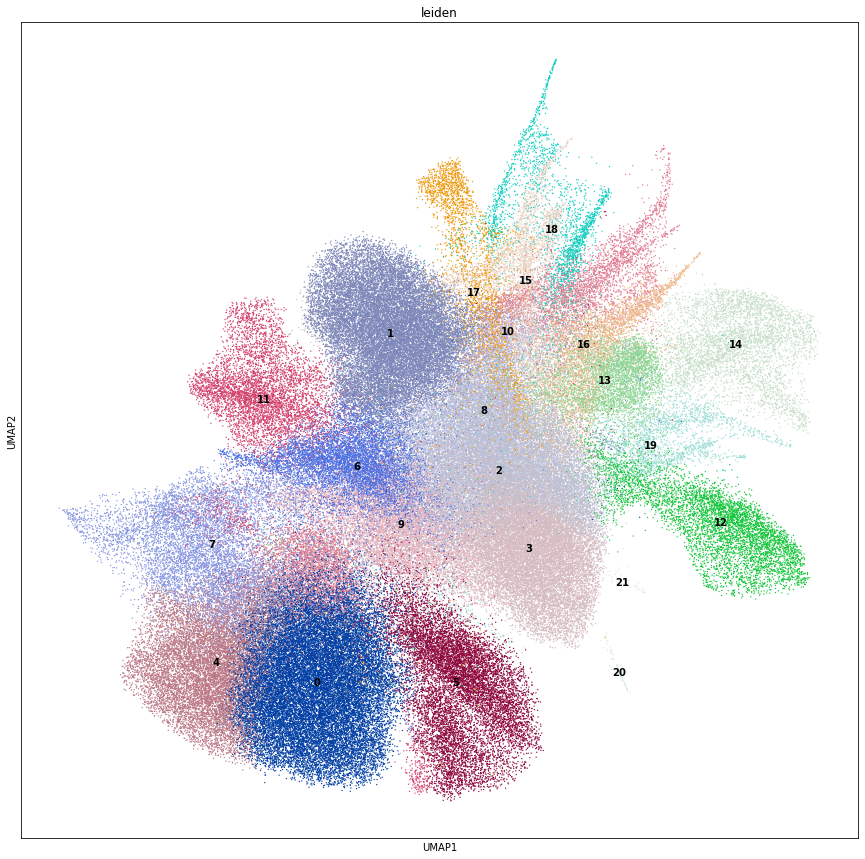

In [4]:
fig, ax = plt.subplots(figsize=(15,15))
sc.pl.umap(adata, color='leiden', ax=ax, size = 7, legend_loc='on data')
plt.show()

In [10]:
adata.obs.to_csv("../../outs/HVCD1_region2_CellSeg_clusters.csv")

In [13]:
adata.write("../../outs/HVCD1_region2_CellSeg_cluster-checkpoint.h5ad")
# adata = sc.read('../../outs/R1_region1_CellSeg_cluster-checkpoint-mod1.h5ad')

In [ ]:
adata_sub.obs.to_csv("../../outs/R1_region1_CellSeg_subclusters.csv")

In [ ]:
## Revisions
- Drop dead cells, as defined by DAPI signal
- Remove sample specific cell names

In [3]:
adata = sc.read('../../outs/HVCD1_region2_CellSeg_cluster-checkpoint.h5ad')

In [4]:
adata.obs.cell_type.value_counts()

CD4_T_Cell         54914
B_Cell             40123
Macrophage         24210
CD8_T_Cell         19525
cDC1               15696
FDC                14475
pDC                11094
Endothelial        10563
cDC2                4874
Tfh                 3132
Plasma_Cell         2421
Neutrophil          1991
Lymphatics          1628
unknown             1063
Macrophage_MPO+      592
Mast_Cell             46
Name: cell_type, dtype: int64

In [5]:
adata.obs['new_cell_type'] = adata.obs.cell_type.astype(str)

In [6]:
adata.obs.loc[adata.obs['new_cell_type'] == 'Macrophage_MPO_pos' , 'new_cell_type'] = "Macrophage"

/mnt/isilon/cscb/software/anaconda3/envs/scanpy-basic/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'new_cell_type' as categorical


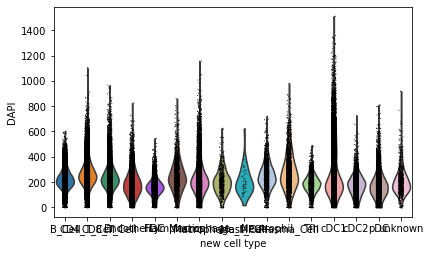

In [7]:
sc.pl.violin(adata, ['DAPI'], groupby='new_cell_type')
# sc.pl.violin(adata, ['DAPI']) #hmmm, no obvious cut off point

In [8]:
adata.write("../../outs/cleaned_ref_data/HVCD1_v2.h5ad")